   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY
     Age Sex      BP Cholesterol  Na_to_K   Drug
190   58   M    HIGH        HIGH   18.991  DrugY
191   23   M    HIGH        HIGH    8.011  drugA
192   72   M     LOW        HIGH   16.310  DrugY
193   72   M     LOW        HIGH    6.769  drugC
194   46   F    HIGH        HIGH   34.686  DrugY
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020 

<ipython-input-13-cfc0ac1efb0d>:77: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(),inplace=True)


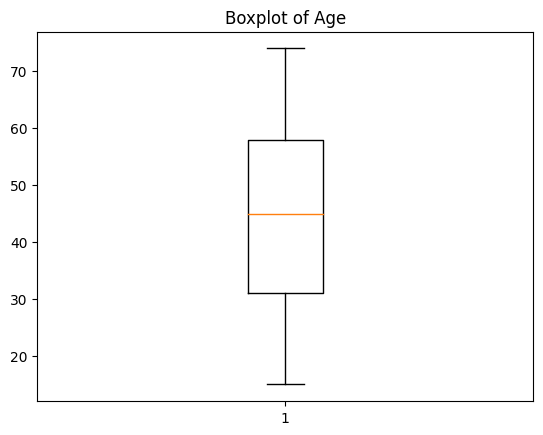

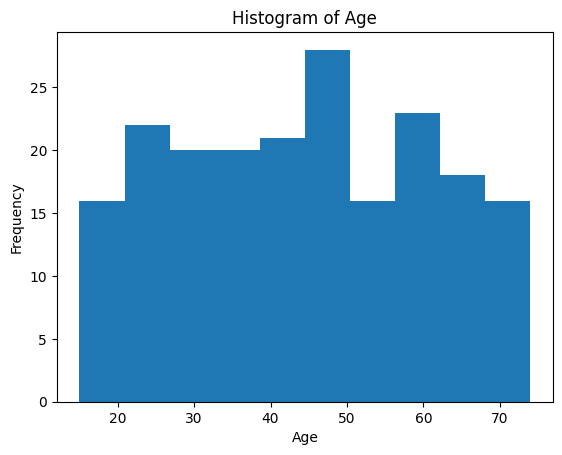

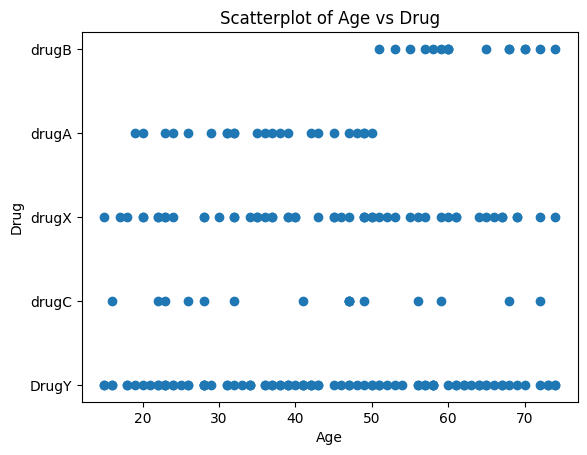

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset=pd.read_csv('drug200.csv')
#A
dataset_1st_10_roes=dataset.head(10)
print(dataset_1st_10_roes)
#B
dataset_last_10_roes=dataset.tail(10)
print(dataset_last_10_roes)
#c
rows,col=dataset.shape
print(rows)
print(col)
#D
columns=dataset.columns
print(columns)

#E
last_col=dataset.columns[-1]
print(last_col)
#F
col_4th=dataset.columns[4]
print(col_4th)
#G
Gf= dataset['Sex'].unique()
print(len(Gf))
#H
#idxmax() return name of column with max frequency 
xa=dataset['Sex'].value_counts().idxmax()
print(xa)

#i

numerical_values=dataset.select_dtypes(include=['int','float']).columns
for i in numerical_values:
    #.mean() returns the mean
     print('column' ,i )
     print('Mean',dataset[i].mean())  
     #.std returns standard deviation
     
     print('standard deviation' , dataset[i].std())  
     #.quantile() returns percentile   
     print('q0' , dataset[i].quantile(0.25))  
     print('q1' , dataset[i].quantile(0.5))  
     print('q2' , dataset[i].quantile(0.65)) 
     print('-------------------------------------') 
     
   
#2 a)
var1=dataset[dataset['Age']>60]
print(var1)
#2 b)
var2=dataset[dataset['Drug'].str.startswith('y')]
print(var2 , var2.count() )

#2 c)
dataset.describe()

#2 D)
dataset['Age'] = dataset['Age'].astype('object')
dataset['Na_to_K'] = dataset['Na_to_K'].astype('object')
dataset.dtypes


#2 E) 
db_ordered_by_age=dataset.groupby(['Age','Na_to_K'])
print(db_ordered_by_age.first())


#2 F)
print(dataset.isnull().any())

#2 G)
dataset.fillna(dataset.mean(),inplace=True)

#2 H)
duplicate = dataset.duplicated(keep=False).sum()
print(duplicate)

#2 i) 

bins = pd.cut(dataset['Age'], 6)
bin_counts = bins.value_counts()
print("bin counts", bin_counts)

#2 j)
temp = dataset.isna().sum(axis=1)==2
print(temp[temp].index)

#2 K)
                
max_age_index=dataset['Age'].max()
print(dataset[dataset.Age == dataset.Age.max()]  )        

#2 L)
plt.boxplot(dataset['Age'])
plt.title('Boxplot of Age')
plt.show()

#2 M)

plt.hist(dataset['Age'])
plt.title('Histogram of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#2 n)
plt.scatter(dataset['Age'], dataset['Drug'])
plt.title('Scatterplot of Age vs Drug')
plt.xlabel("Age")
plt.ylabel("Drug")
plt.show()

In [28]:
#Data spliting part
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.datasets import load_iris
from sklearn.utils.multiclass import  unique_labels

y=dataset['Cholesterol']

x1=dataset.drop('Cholesterol', axis=1)
x=pd.get_dummies( x1, columns = ['Sex','BP','Drug'])#applying one hot encoding on non numerical features


-----------------------------------------------------------------------------------------
K-NearestNeighbor accuracy is
0.5
-----------------------------------------------------------------------------------------
K-NearestNeighbor confusion matrix is


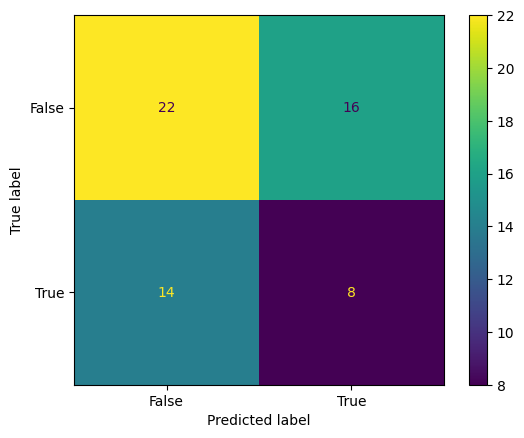

-----------------------------------------------------------------------------------------
K-NearestNeighbor precision is
0.4722222222222222
-----------------------------------------------------------------------------------------
K-NearestNeighbor recall is
0.47129186602870815
-----------------------------------------------------------------------------------------


In [29]:
from sklearn.neighbors import KNeighborsClassifier
#K_NearestNeighbor part

Kx_train,Kx_test,Ky_train,Ky_test=train_test_split( x , y , test_size=0.30)#calculating training and testing sets
#1
unique_labels(Ky_test)#appling unique_labels on y_test
neigh=KNeighborsClassifier(n_neighbors=3)#Creating the model
neigh.fit(Kx_train,Ky_train)#fetching training sets to the model
Kpred=neigh.predict(Kx_test)#predicted values

print('-----------------------------------------------------------------------------------------')


print('K-NearestNeighbor accuracy is')
K_acc=accuracy_score(Ky_test,Kpred)#calculating the accuracy
knn_precision = precision_score(Ky_test, Kpred, average='macro')#calculating the precision
knn_recall = recall_score(Ky_test, Kpred, average='macro')#calculating the recall
print(K_acc)

print('-----------------------------------------------------------------------------------------')

print('K-NearestNeighbor confusion matrix is')
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Ky_test, Kpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 
#print(plot(Ky_test, Kpred))#calling method of printing and calculating confusion matrix

print('-----------------------------------------------------------------------------------------')

print('K-NearestNeighbor precision is')
print(knn_precision)

print('-----------------------------------------------------------------------------------------')

print('K-NearestNeighbor recall is')
print(knn_recall)

print('-----------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------
GaussianNB accuracy is
0.6333333333333333
-----------------------------------------------------------------------------------------
GaussianNB confusion matrix is


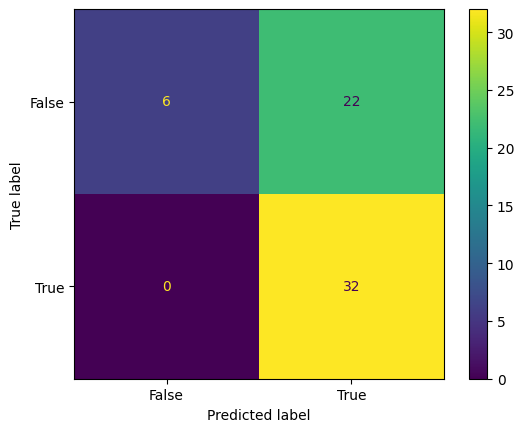

-----------------------------------------------------------------------------------------
GaussianNB precision is
0.7962962962962963
-----------------------------------------------------------------------------------------
GaussianNB recall is
0.6071428571428571
-----------------------------------------------------------------------------------------


In [30]:
#GaussianNB part
from sklearn.naive_bayes import GaussianNB
Gx_train,Gx_test,Gy_train,Gy_test=train_test_split( x , y , test_size=0.30)#calculating training and testing sets

unique_labels(Gy_test)#appling unique_labels on y_test
gnb=GaussianNB()#Creating the model
gnb.fit(Gx_train,Gy_train)#fetching training sets to the model
Gpred=gnb.predict(Gx_test)#predicted values

print('-----------------------------------------------------------------------------------------')

print('GaussianNB accuracy is')
G_acc=accuracy_score(Gy_test,Gpred)#calculating the accuracy
print(G_acc)
g_precision = precision_score(Gy_test, Gpred, average='macro')#calculating the precision
g_recall = recall_score(Gy_test, Gpred, average='macro')#calculating the recall

print('-----------------------------------------------------------------------------------------')


print('GaussianNB confusion matrix is')
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Gy_test, Gpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 
print('-----------------------------------------------------------------------------------------')

print('GaussianNB precision is')
print(g_precision)

print('-----------------------------------------------------------------------------------------')

print('GaussianNB recall is')
print(g_recall)

print('-----------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------------
Decision Trees accuracy is
0.5333333333333333
-----------------------------------------------------------------------------------------
Decision Trees confusion matrix is


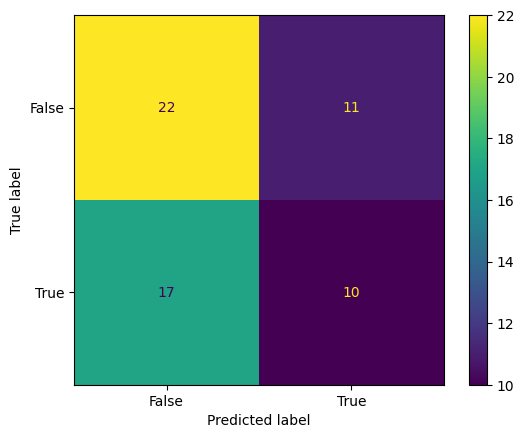

-----------------------------------------------------------------------------------------
Decision Trees precision is
0.5201465201465201
-----------------------------------------------------------------------------------------
Decision Trees recall is
0.5185185185185185
-----------------------------------------------------------------------------------------


In [31]:
#Decision Trees
from sklearn import tree

cx_train,cx_test,cy_train,cy_test=train_test_split( x , y , test_size=0.30)#calculating training and testing sets

unique_labels(cy_test)#appling unique_labels on y_test


clf = tree.DecisionTreeClassifier()#Creating the model
clf = clf.fit(cx_train,cy_train)#fetching training sets to the model
clf_Pred=clf.predict(cx_test)#predicted values

print('-----------------------------------------------------------------------------------------')

print('Decision Trees accuracy is')
C_acc=accuracy_score(cy_test,clf_Pred)#calculating the accuracy
print(C_acc)
c_precision = precision_score(cy_test, clf_Pred, average='macro')#calculating the precision
c_recall = recall_score(cy_test, clf_Pred, average='macro')#calculating the recall

print('-----------------------------------------------------------------------------------------')

print('Decision Trees confusion matrix is')
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(cy_test, clf_Pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 
print('-----------------------------------------------------------------------------------------')

print('Decision Trees precision is')
print(c_precision)

print('-----------------------------------------------------------------------------------------')

print('Decision Trees recall is')
print(c_recall)
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Support Vector Machine accuracy is
0.43333333333333335
-----------------------------------------------------------------------------------------
Support Vector Machine confusion matrix is


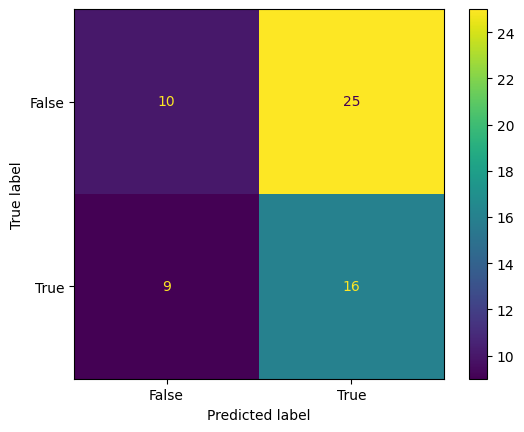

-----------------------------------------------------------------------------------------
Support Vector Machine precision is
0.4582798459563543
-----------------------------------------------------------------------------------------
Support Vector Machine recall is
0.46285714285714286
-----------------------------------------------------------------------------------------


In [32]:

#Support Vector Machine part
from sklearn import svm
sx_train,sx_test,sy_train,sy_test=train_test_split( x , y , test_size=0.30)#calculating training and testing sets

unique_labels(sy_test)#appling unique_labels on y_test


svma = svm.SVC()#Creating the model
svma.fit(sx_train,sy_train)#fetching training sets to the model
svmpred=svma.predict(sx_test)#predicted values

print('-----------------------------------------------------------------------------------------')


print('Support Vector Machine accuracy is')
s_acc=accuracy_score(sy_test,svmpred)#calculating the accuracy
print(s_acc)
s_precision = precision_score(sy_test, svmpred, average='macro')#calculating the precision
s_recall = recall_score(sy_test, svmpred, average='macro')#calculating the recall

print('-----------------------------------------------------------------------------------------')

print('Support Vector Machine confusion matrix is')
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(sy_test, svmpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 
print('-----------------------------------------------------------------------------------------')

print('Support Vector Machine precision is')
print(s_precision)

print('-----------------------------------------------------------------------------------------')

print('Support Vector Machine recall is')
print(s_recall)

print('-----------------------------------------------------------------------------------------')



-----------------------------------------------------------------------------------------
Random Forest accuracy is
0.6
-----------------------------------------------------------------------------------------
Random Forest confusion matrix is


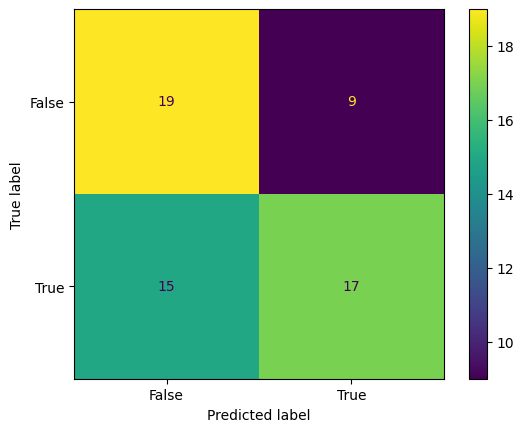

-----------------------------------------------------------------------------------------
Random Forest precision is
0.6063348416289593
-----------------------------------------------------------------------------------------
Random Forest recall is
0.6049107142857143
-----------------------------------------------------------------------------------------


In [33]:
#Random Forest part
from sklearn.ensemble import RandomForestClassifier
rdx_train,rdx_test,rdy_train,rdy_test=train_test_split( x , y , test_size=0.30, random_state=100)#calculating training and testing sets

unique_labels(rdy_test)#appling unique_labels on y_test


rd  = RandomForestClassifier(n_estimators=100, random_state=100)#Creating the model
rd.fit(rdx_train,rdy_train)#fetching training sets to the model
rdpred=rd.predict(rdx_test)#predicted values


print('-----------------------------------------------------------------------------------------')
print('Random Forest accuracy is')
r_acc=accuracy_score(rdy_test,rdpred)#calculating the accuracy
print(r_acc)
r_precision = precision_score(rdy_test, rdpred, average='macro')#calculating the precision
r_recall = recall_score(rdy_test, rdpred, average='macro')#calculating the recall

print('-----------------------------------------------------------------------------------------')

print('Random Forest confusion matrix is')
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(rdy_test, rdpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 
print('-----------------------------------------------------------------------------------------')

print('Random Forest precision is')
print(r_precision)

print('-----------------------------------------------------------------------------------------')

print('Random Forest recall is')
print(r_recall)
print('-----------------------------------------------------------------------------------------')




In [ ]:
#GaussianNB is the best prediction algorithm 